In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from functools import reduce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure

ModuleNotFoundError: No module named 'dask'

In [2]:
# pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import datetime
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.linear_model import Perceptron
from sklearn.inspection import permutation_importance

# Predicting a user's persona based on their device's specs, CPU utilization, and average CPU heat 

In [ ]:
pd.set_option('display.max_columns', 500)

In [3]:
# ok = pd.read_csv('../data/raw/hw_metric_histo.csv000',nrows=100, sep='\t')
# ok['load_ts'].max()

In [4]:
# print(ok['load_ts'].min())
# print(ok['load_ts'].max())

In [5]:
df = pd.read_csv('../data/raw/hw_metric_histo.csv000', usecols=['guid','load_ts', 'batch_id','name','instance','nrs',
                                                               'mean', 'histogram_min', 'histogram_max',
                                                               'metric_max_val'], sep='\t')

In [6]:
# df.shape

In [7]:
# df['name'].value_counts()

In [8]:
# df['histogram_min'].value_counts()

In [9]:
# df['histogram_max'].value_counts()

## Memory Reduction

In [10]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: 
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [11]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(df_int))
print(mem_usage(converted_int))

0.00 MB
0.00 MB


In [12]:
compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

,before,after


In [13]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')
print(mem_usage(df_float))
print(mem_usage(converted_float))
compare_floats = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

4167.21 MB
2083.61 MB


,before,after
float32,NaN,3.0
float64,3.0,NaN


In [14]:
optimized_df = df.copy()
optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
print(mem_usage(df))
print(mem_usage(optimized_df))

64194.17 MB
62110.56 MB


In [15]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe()

,load_ts,batch_id,guid,name
count,182068335,182068335,182068335,182068335
unique,359,359,70389,13
top,2020-03-24 04:09:37,20200323-210235,058056b25d594e7a87f20b1d272c6652,HW::CORE:C0:PERCENT:
freq,1337177,1337177,45525,68817949


In [16]:
converted_obj = pd.DataFrame()
for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

MemoryError: Unable to allocate 1.36 GiB for an array with shape (182068335,) and data type int64

In [ ]:
optimized_df[converted_obj.columns] = converted_obj
mem_usage(optimized_df)

In [ ]:
# optimized_df.head()

## Cleaning

In [ ]:
# chips = optimized_df.loc[optimized_df['name'] == 'HW:::CHIPSET_TEMPERATURE:CENTIGRADE:']

In [ ]:
# chips.head()

In [ ]:
cpu = optimized_df.loc[optimized_df['name'] == 'HW::CORE:C0:PERCENT:']

In [ ]:
cpu.head()

In [ ]:
temp = optimized_df.loc[optimized_df['name'] == 'HW::CORE:TEMPERATURE:CENTIGRADE:']

In [ ]:
temp.head()

In [ ]:
# chips_guid = list(chips['guid'].value_counts().index)
# cpu_guid = list(cpu['guid'].value_counts().index)
# temp_guid = list(temp['guid'].value_counts().index)

In [ ]:
# overlap = [x for x in temp_guid if x in cpu_guid]
# len(overlap)

In [ ]:
# total_overlap = [x for x in overlap if x in temp_guid]

In [ ]:
# len(total_overlap)

## Joining Device Usage

In [ ]:
# dev = pd.read_csv('../data/raw/devuse_4known_device.csv001',usecols=['guid','load_ts','batch_id','device', 
#                                                                  'hw_name', 'name',
#                                                                  'duration', 
#                                                                  'status'], sep='\t')

In [ ]:
# dev.shape

In [ ]:
# print(df['guid'].nunique())
# print(dev['guid'].nunique())

In [ ]:
# print(dev['load_ts'].min())
# print(dev['load_ts'].max())

In [ ]:
# dev_guid = list(dev['guid'].value_counts().index)

In [ ]:
# df_guid = list(df['guid'].value_counts().index)

In [ ]:
# print(dev_guid[:5])

In [ ]:
# print(df_guid[:5])

In [ ]:
# df_guid = all guids from hw_metric
# dev_guid = all guids from devuse

In [ ]:
# combined_overlap = [x for x in dev_guid if x in df_guid]

In [ ]:
# combined_overlap

*Seems like there is no overlap between the two DFs*

In [ ]:
# cpu_mean = cpu[['guid','batch_id','mean']]
# temp_mean = temp[['guid','batch_id','mean']]

In [ ]:
# top10guid = pd.DataFrame(cpu_mean['guid'].value_counts()).reset_index()[:10]
# top10 = list(top10guid['index'])

In [ ]:
# top10cpu = cpu_mean.loc[cpu_mean['guid'].isin(top10)]
# top10cpu.head()

In [ ]:
# top10temp = temp_mean.loc[temp_mean['guid'].isin(top10)]
# top10temp.head()

In [ ]:
# print(top10cpu.shape)
# print(top10temp.shape)

## Data Visualizations

In [ ]:
# cpu_mean

In [ ]:
# temp_mean

In [ ]:
# gb = pd.DataFrame(cpu_mean.groupby('guid')['mean'].mean())
# top5avgcpu = gb.sort_values(by='mean', ascending=False)[:5].reset_index()
# top5avgcpu

In [ ]:
# def cleanguid(x):
#     return x[:5]

In [ ]:
# top5avgcpu['guid'] = top5avgcpu['guid'].apply(cleanguid)

In [ ]:
# gb_temp = pd.DataFrame(temp_mean.groupby('guid')['mean'].mean())
# top5avgtemp = gb_temp.sort_values(by='mean', ascending=False)[:5].reset_index()

In [ ]:
# top5avgtemp['guid'] = top5avgtemp['guid'].apply(cleanguid)

In [ ]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.barplot(x="guid", y="mean", data=top5avgcpu)
# plt.xlabel('GUID')
# plt.ylabel('Mean CPU Usage')
# plt.title('Top Five CPU Usage by GUIDs')
# plt.show()

In [ ]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.barplot(x="guid", y="mean", data=top5avgtemp)
# plt.xlabel('GUID')
# plt.ylabel('Mean Temperature in Celsium')
# plt.title('Top Five CPU Core Temperatures by GUIDs')
# plt.show()

In [ ]:
# top5avgcpu

In [ ]:
# top5avgtemp

In [ ]:
# pd.DataFrame(df['guid'].value_counts())

## EDA For system_sysinfo_unique_normalized

In [ ]:
sys = pd.read_csv('../data/raw/system_sysinfo_unique_normalized.csv000', sep=chr(1))

In [ ]:
sys_guid = list(sys['guid'].value_counts().index)
hw_guid = list(df['guid'].value_counts().index)
#dev_guid = list(dev['guid'].value_counts().index)

In [ ]:
syshw_overlap = [x for x in sys_guid if x in hw_guid]
len(syshw_overlap)

In [ ]:
sys.head()

In [ ]:
# sys['persona'].value_counts()

In [ ]:
df.head()

In [ ]:
hwcpu_match = cpu.loc[cpu['guid'].isin(syshw_overlap)]
hwcpu_match = hwcpu_match[['guid', 'load_ts', 'mean']]
hwcpu_match['utilization_mean'] = hwcpu_match['mean']
hwcpu_match = hwcpu_match.drop(columns='mean')
hwcpu_match

In [ ]:
hwtemp_match = temp.loc[temp['guid'].isin(syshw_overlap)]
hwtemp_match = hwtemp_match[['guid', 'load_ts', 'mean']]
hwtemp_match['temp_mean'] = hwtemp_match['mean']
hwtemp_match = hwtemp_match.drop(columns='mean')
hwtemp_match

In [ ]:
hwtemp = pd.DataFrame(hwtemp_match.groupby('guid')['temp_mean'].mean())

In [ ]:
hwcpu = pd.DataFrame(hwcpu_match.groupby('guid')['utilization_mean'].mean())

In [ ]:
hwtemp

In [ ]:
hwcpu

In [ ]:
#combined_sys['temp_mean']=combined_sys['temp_mean'].fillna(hwtemp.index.to_series())

In [ ]:
combined = sys.join(hwcpu, on=['guid'], how='left')
combined

In [ ]:
combined = combined.join(hwtemp, on=['guid'], how='left')
combined

In [ ]:
combined['utilization_mean'].value_counts()

## ucsd_apps_execlass.csv000 & frgnd_backgrnd_apps.csv000

In [ ]:
apps = pd.read_csv('../data/raw/frgnd_backgrnd_apps.csv000', error_bad_lines=False, sep=chr(1))

In [ ]:
app_class = pd.read_csv('../data/raw/ucsd_apps_execlass.csv000', error_bad_lines=False, sep=chr(35))
app_class

In [ ]:
appscombined = apps.join(app_class, lsuffix='frgnd_proc_name', rsuffix='exe_name', how='left')
appscombined

In [ ]:
mean_dur = appscombined.pivot_table('event_duration_ms', ['guid', 'app_type'], aggfunc=np.mean).reset_index()

In [ ]:
combined_guid = list(combined['guid'].value_counts().index)
dur_guid = list(mean_dur['guid'].value_counts().index)
app_overlap = [x for x in combined_guid if x in dur_guid]

In [ ]:
mean_dur=mean_dur.loc[mean_dur['guid'].isin(app_overlap)]

In [ ]:
mean_dur['app_type'].unique()

In [ ]:
itdur = mean_dur.loc[mean_dur['app_type']=='IT']
avdur  = mean_dur.loc[mean_dur['app_type']=='Anti-Virus']
commdur = mean_dur.loc[mean_dur['app_type']=='Communication']
gamedur = mean_dur.loc[mean_dur['app_type']=='Game']
iudur = mean_dur.loc[mean_dur['app_type']=='Installer/Updater']
intdur = mean_dur.loc[mean_dur['app_type']=='Internet']
meddur = mean_dur.loc[mean_dur['app_type']=='Media/Consumption']
netdur = mean_dur.loc[mean_dur['app_type']=='Network Apps']
offdur = mean_dur.loc[mean_dur['app_type']=='Office']
sysdur = mean_dur.loc[mean_dur['app_type']=='System/Other']
utdur = mean_dur.loc[mean_dur['app_type']=='Utility']
meditdur = mean_dur.loc[mean_dur['app_type']=='Media/Edit']
udur =  mean_dur.loc[mean_dur['app_type']=='*']
edudur = mean_dur.loc[mean_dur['app_type']=='Education']
appdur = mean_dur.loc[mean_dur['app_type']=='Metro/Universal Apps']
oobedur = mean_dur.loc[mean_dur['app_type']=='OOBE']
gldur = mean_dur.loc[mean_dur['app_type']=='Game Launcher']

In [ ]:
types = [itdur, avdur, commdur, gamedur, iudur, intdur, meddur, netdur, 
       offdur, sysdur, utdur, meditdur, udur, edudur, appdur, oobedur, gldur]

In [ ]:
for x in types:
    string = x['app_type'].iloc[0]
    x = x.drop(columns = ['app_type'])
    new_col = string + '_dur_ms'
    x[new_col] = x['event_duration_ms']
    x = x.drop(columns = ['event_duration_ms'])
    combined = combined.merge(x, on=['guid'], how='left')

In [ ]:
combined

In [ ]:
lst = ['IT_dur_ms', 'Anti-Virus_dur_ms',
      'Communication_dur_ms', 'Game_dur_ms', 'Installer/Updater_dur_ms', 'Internet_dur_ms',
      'Media/Consumption_dur_ms', 'Network Apps_dur_ms', 'Office_dur_ms', 'System/Other_dur_ms', 
      'Utility_dur_ms', 'Media/Edit_dur_ms',  '*_dur_ms', 'Education_dur_ms','Metro/Universal Apps_dur_ms',
      'OOBE_dur_ms']
for i in lst:
    combined=combined.fillna({i:0})

In [ ]:
check = combined.copy()

In [ ]:
checking = check[['guid', 'load_ts','chassistype', 'modelvendor_normalized', 
                      'ram', 
                     'os','#ofcores', 'age_category',
                    'graphicsmanuf', 'gfxcard', 'graphicscardclass',
                     'cpuvendor', 'cpu_family',
                    'discretegraphics', 'vpro_enabled', 'utilization_mean', 
                     'temp_mean','IT_dur_ms', 'Anti-Virus_dur_ms',
      'Communication_dur_ms', 'Game_dur_ms', 'Installer/Updater_dur_ms', 'Internet_dur_ms',
      'Media/Consumption_dur_ms', 'Network Apps_dur_ms', 'Office_dur_ms', 'System/Other_dur_ms', 
      'Utility_dur_ms', 'Media/Edit_dur_ms',  '*_dur_ms', 'Education_dur_ms','Metro/Universal Apps_dur_ms',
      'OOBE_dur_ms', 'persona']]

In [ ]:
nonacheck = checking.dropna()
nonacheck

In [ ]:
nonacheck['guid'].nunique()

In [ ]:
print(nonacheck['load_ts'].apply(pd.to_datetime).max())
print(nonacheck['load_ts'].apply(pd.to_datetime).min())

In [ ]:
# check = check[['chassistype', 'modelvendor_normalized', 
#                       'ram', 
#                      'os','#ofcores', 'age_category',
#                     'graphicsmanuf', 'gfxcard', 'graphicscardclass',
#                      'cpuvendor', 'cpu_family',
#                     'discretegraphics', 'vpro_enabled', 'utilization_mean', 
#                      'temp_mean','persona', 'IT_dur_ms', 'Anti-Virus_dur_ms',
#       'Communication_dur_ms', 'Game_dur_ms', 'Installer/Updater_dur_ms', 'Internet_dur_ms',
#       'Media/Consumption_dur_ms', 'Network Apps_dur_ms', 'Office_dur_ms', 'System/Other_dur_ms', 
#       'Utility_dur_ms', 'Media/Edit_dur_ms',  '*_dur_ms', 'Education_dur_ms','Metro/Universal Apps_dur_ms',
#       'OOBE_dur_ms']]

In [ ]:
# check.isna().sum()

In [ ]:
# check

In [ ]:
# sys['guid'].nunique()

In [ ]:
# cpu['guid'].nunique()

In [ ]:
# print(combined['utilization_mean'].isna().sum())
# print(combined['temp_mean'].isna().sum())

In [ ]:
combined = combined[['chassistype', 'modelvendor_normalized', 
                      'ram', 
                     'os','#ofcores', 'age_category',
                    'graphicsmanuf', 'gfxcard', 'graphicscardclass',
                     'cpuvendor', 'cpu_family',
                    'discretegraphics', 'vpro_enabled', 'utilization_mean', 
                     'temp_mean','IT_dur_ms', 'Anti-Virus_dur_ms',
      'Communication_dur_ms', 'Game_dur_ms', 'Installer/Updater_dur_ms', 'Internet_dur_ms',
      'Media/Consumption_dur_ms', 'Network Apps_dur_ms', 'Office_dur_ms', 'System/Other_dur_ms', 
      'Utility_dur_ms', 'Media/Edit_dur_ms',  '*_dur_ms', 'Education_dur_ms','Metro/Universal Apps_dur_ms',
      'OOBE_dur_ms', 'persona']]

In [ ]:
combined.head()

In [ ]:
# combined.dtypes

In [ ]:
copy = combined.copy()
copy.head()

In [ ]:
print(copy['os'].unique())
print(copy['cpu_family'].unique())
print(copy['cpuvendor'].unique())
print(copy['graphicscardclass'].unique())

In [ ]:
# copy_cat = copy[['os','cpu_family', 'cpuvendor', 'graphicscardclass']]

In [ ]:
# dummy = pd.get_dummies(copy_cat)
# dummy['persona'] = copy['persona']

In [ ]:
# dummy

In [ ]:
cleanup_nums = {"persona": {"Web User": 0, "Casual User": 1, 'Gamer':2, 'Casual Gamer': 3, 'Office/Productivity':4,
                           'Content Creator/IT': 5, 'Communication': 6,
                           'Win Store App User': 7, 'Entertainment': 8,
                          'File & Network Sharer':9, 'Unknown': 10}}

In [ ]:
cleanup_nums

In [ ]:
def macro_cats(x):
    if x=='Web User' or x=='Casual User' or x=='Communication' or x=='Win Store App User' or x=='Entertainment' or x=='File & Network Sharer':
        return 0
    elif x=='Gamer' or x=='Casual Gamer':
        return 1
    elif x=='Office/Productivity' or x=='Content Creator/IT':
        return 2
    elif x == 'Unknown':
        return 3
    else:
        return 4

In [ ]:
nonacopy = copy.dropna()
nonacopy['persona'].unique()[9]

In [ ]:
encode_persona = combined['persona'].to_frame().replace(cleanup_nums)

In [ ]:
encode_persona['persona'].value_counts()

In [ ]:
# dummy['util_mean'] = combined['utilization_mean']
# dummy['temp_mean'] = combined['temp_mean']
# dummy = dummy.drop(columns=['persona'])
# dummy['persona'] = encode_persona['persona']

In [ ]:
# dummy

In [ ]:
# dummy_nona = dummy.dropna()
# dummy_nona

In [ ]:
# nona_test = dummy_nona.copy()

In [ ]:
# Y = nona_test['persona']
# X = nona_test.drop(columns=['persona'])

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
names = ["Decision_Tree", "Extra_Trees", "Random_Forest", "AdaBoost"]
#     "Nearest_Neighbors", "Linear_SVM",
#          "Polynomial_SVM", "RBF_SVM", "Gradient_Boosting"]
        # "Gaussician_Process"]
#         "Neural_Net", "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100)]
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(kernel="poly", degree=3, C=0.025),
#     SVC(kernel="rbf", C=1, gamma=2),
#     GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)]
    #GaussianProcessClassifier(1.0 * RBF(1.0))]
    #
#     MLPClassifier(alpha=1, max_iter=1000),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
#     SGDClassifier(loss="hinge", penalty="l2")]

In [ ]:
# scores = []
# for name, clf in zip(names, classifiers):
#     clf.fit(X_train, Y_train)
#     score = clf.score(X_test, Y_test)
#     scores.append(score)
#     print(1)

In [ ]:
# scores

In [ ]:
# show = pd.DataFrame()
# show['name'] = names
# show['score'] = scores
# show

In [ ]:
# cm = sns.light_palette("green", as_cmap=True)
# s = show.style.background_gradient(cmap=cm)
# s

In [ ]:
# sns.set(style="whitegrid")
# ax = sns.barplot(y="name", x="score", data=show)

In [ ]:
# combined['persona'].value_counts()

In [ ]:
# combined['model_normalized']

In [ ]:
# print(len(combined['modelvendor_normalized'].value_counts()))
# print(len(combined['ram'].value_counts()))

In [ ]:
# combined['ram'].value_counts()

In [ ]:
# combined['gfxcard'].value_counts()[:20]

In [ ]:
# combined['graphicscardclass'].value_counts()

In [ ]:
# sys['cpu_family']

In [ ]:
# feats = combined.select_dtypes(include=['object'])

In [ ]:
# list(feats.columns)

In [ ]:
# hasher = FeatureHasher(n_features=12, input_type='string')
# f = hasher.transform(combined)
# f = f.toarray()
# hashed = pd.DataFrame(f, columns = list(feats.columns))
# hashed

In [ ]:
morecats = combined.dropna()

In [ ]:
morecats['persona'] = morecats['persona'].apply(macro_cats)

In [ ]:
morecats

In [ ]:
# dumcats['persona'] = morecats.drop(columns=['persona'])

In [ ]:
# encode_persona = combined['persona'].to_frame().replace(cleanup_nums)

In [ ]:
# dumcats['persona'] = encode_persona['persona']

In [ ]:
morecats['persona'].value_counts()

In [ ]:
# dumcats

In [ ]:
Y = morecats['persona']
X = morecats.drop(columns=['persona'])

In [ ]:
X = pd.get_dummies(X)
X

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
names = ["Decision_Tree", "Extra_Trees", "Random_Forest", "AdaBoost","Nearest_Neighbors", "Gradient_Boosting"]
#"Gaussician_Process"]
#  "Linear_SVM",
#          "Polynomial_SVM", "RBF_SVM",
#         "Neural_Net", "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2, class_weight='balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=100, class_weight='balanced'),
    AdaBoostClassifier(n_estimators=100),
    KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025, class_weight='balanced'),
#     SVC(kernel="poly", degree=3, C=0.025, class_weight='balanced'),
#     SVC(kernel="rbf", C=1, gamma=2, class_weight='balanced'),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)]
    #GaussianProcessClassifier(1.0 * RBF(1.0))]
    #
#     MLPClassifier(alpha=1, max_iter=1000),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
#     SGDClassifier(loss="hinge", penalty="l2")]

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)
    print(score)

In [ ]:
show = pd.DataFrame()
show['name'] = names
show['score'] = scores
show

In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = show.style.background_gradient(cmap=cm)
s

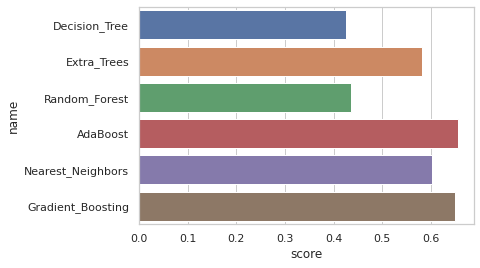

In [149]:
# sns.set(style="whitegrid")
# ax = sns.barplot(y="name", x="score", data=show)

In [ ]:
feature_names = X_train.columns

In [151]:
#fig.set_size_inches(18.5, 10.5)
# plt.rcParams["figure.figsize"] = (100,300)

NameError: name 'fig' is not defined

In [ ]:
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
x=range(len(top5))
labels=np.array(feature_names)[sorted_idx]
top5 = labels[:5]
data5 = importances[sorted_idx][:5]
# plt.bar(5, data5, tick_label=top5)
# plt.xticks(rotation=90)
# plt.show();

In [ ]:
bestfeats = pd.DataFrame()
bestfeats['feature'] = top5
bestfeats['importance'] = data5

In [ ]:
bestfeats

In [ ]:
# feature_importance = clf.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# fig = plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# sorted_idx
# # plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
# # plt.title('Feature Importance (MDI)')

# result = permutation_importance(clf, X_test, Y_test, n_repeats=10,
#                                 random_state=42, n_jobs=2)
# sorted_idx = result.importances_mean.argsort()
# # plt.subplot(1, 2, 2)
# # plt.boxplot(result.importances[sorted_idx].T,
# #             vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
# # plt.title("Permutation Importance (test set)")
# # fig.tight_layout()
# # plt.show()

In [ ]:
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import GridSearchCV
# param_dict = {
#     'criterion':['gini','entropy'],
#     'max_depth':range(1,10),
#     'min_samples_split':range(1,10),
#     'min_samples_leaf':range(1,5)
# }

In [ ]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, Y_train)

In [ ]:
mat = confusion_matrix(Y_test,ada.predict(X_test))

In [ ]:
plt.figure(figsize=(10 , 10))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
# Save confusion matrix to outputs in Workbench
plt.show()

In [ ]:
# rbfsvc = SVC(kernel="rbf", C=1, gamma=2, class_weight='balanced')
# rbfsvc.fit(X_train, Y_train)
# mat = confusion_matrix(Y_test,rbfsvc.predict(X_test))
# plt.figure(figsize=(10 , 10))
# sns.set()
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=np.unique(Y_test),
#             yticklabels=np.unique(Y_test))
# plt.xlabel('True Label')
# plt.ylabel('Predicted Label')
# # Save confusion matrix to outputs in Workbench
# plt.show()

In [ ]:
et = ExtraTreesClassifier(n_estimators=10, min_samples_split=2, class_weight='balanced')
et.fit(X_train, Y_train)
mat = confusion_matrix(Y_test,et.predict(X_test))
plt.figure(figsize=(10 , 10))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
# Save confusion matrix to outputs in Workbench
plt.show()

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)
gbc.fit(X_train, Y_train)
mat = confusion_matrix(Y_test,gbc.predict(X_test))
plt.figure(figsize=(10 , 10))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
# Save confusion matrix to outputs in Workbench
plt.show()

In [ ]:
nn= KNeighborsClassifier(35)
nn.fit(X_train, Y_train)
mat = confusion_matrix(Y_test,nn.predict(X_test))
plt.figure(figsize=(10 , 10))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
# Save confusion matrix to outputs in Workbench
plt.show()

In [ ]:
per = Perceptron(random_state=1, max_iter=30, tol=0.001, class_weight='balanced', warm_start=True)
per.fit(X_train, Y_train)
mat = confusion_matrix(Y_test,per.predict(X_test))
plt.figure(figsize=(10 , 10))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
# Save confusion matrix to outputs in Workbench
plt.show()

In [ ]:
score = per.score(X_test, Y_test)
score

In [ ]:
# mlp = MLPClassifier(alpha=1e-4, max_iter=20, solver='adam', verbose=10, random_state=1, learning_rate_init=.1,
#                    hidden_layer_sizes=(800,100,2))
# mlp.fit(X_train, Y_train)
# mat = confusion_matrix(Y_test,mlp.predict(X_test))
# plt.figure(figsize=(10 , 10))
# sns.set()
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=np.unique(Y_test),
#             yticklabels=np.unique(Y_test))
# plt.xlabel('True Label')
# plt.ylabel('Predicted Label')
# # Save confusion matrix to outputs in Workbench
# plt.show()

## Neural Net

In [ ]:
print("Num of GPUs:", torch.cuda.device_count())
print("GPU tagger is:", torch.cuda.current_device())
print("GPU model:", torch.cuda.get_device_name(0))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
tens_Xtrain = torch.tensor(X_train.values).to(device)
tens_Xtest = torch.tensor(X_test.values).to(device)

In [ ]:
num_features = X_train.shape[1]
print("Number of trainable features is:", num_features)

In [ ]:
import torchvision
from torch.utils.data import Dataset, DataLoader

class Dataset(Dataset):

    def __init__(self):
        self.x = X_train
        self.y = Y_train
        
        self.n_samples = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    def __len__(self):
        return self.n_samples
    
dataset = Dataset()

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
train_loader

In [ ]:
class Classifier(nn.Module):
    
    def __init__(self, width, n_inputs):
        super(Classifier, self).__init__()
        self.width = width
    
        # input layer
        self.input = nn.Linear(n_inputs, width)
    
        # hidden layers
        self.h1 = nn.Linear(in_features=width, out_features=width)
        self.h2 = nn.Linear(in_features=width, out_features=width)
    
        # output layer
        self.output = nn.Linear(width, 1)

    def forward(self, x):
    
        # input layer
        x = F.relu(self.input(x))
    
        # hidden layers
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        
        # output layer
        x = torch.sigmoid(self.output(x))
    
        return x

In [ ]:
# function to help evaluate the training/test accuracies during training. it compares predictions to labels
# we define a threshold at 0.5, with predictions below classified as bkg & predictions above classified as sig

def get_num_correct(x, y):
    return torch.round(x.float()).eq(y.float()).sum().item()

In [ ]:
from tqdm.notebook import tqdm
import time

def normal_training(epochs=20, batch_size = 291, learning_rate=0.001):        

    # create the network
    network = Classifier(128, n_inputs=num_features).to(device)

    # choose the criterion
    criterion = nn.BCELoss()

    # create the optimiser
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)
    
    # keep track of the losses
    losses = []
    losses_test = []

    avg_losses = []               ######## for plotting we need losses per epoch
    avg_losses_test = []

    # create a data loader to begin the training
    train_loader = torch.utils.data.DataLoader(dataset, batch_size)

    # start a timer
    begt = time.time()
    
    for epoch in tqdm(range(epochs)):
        
        # to evaluate accuracies while training
        correct_preds = 0
        correct_preds_test = 0
        
        for batch in tqdm(train_loader):
            
            X,Y = batch

            # forwardprop
            preds = network(X.float())
            loss = criterion(preds,Y.float())

            # backprop
            optimizer.zero_grad()                    ######## To avoid accumulating the gradients
            loss.backward()
            optimizer.step()

            losses.append(loss.to('cpu').detach().numpy())

            # feedback to assess training accuracy
            correct_preds += get_num_correct(preds, Y)
            
            
            # sample some test data for evaluation
            with torch.no_grad():
                indx = torch.randint(0, X_test.shape[0], size=(5000, ))
                X_t, Y_t = X_test[indx], Y_test[indx]
                output_test = network(X_t.float())
                loss_test = criterion(output_test, Y_t.float())

                losses_test.append(loss_test.to('cpu').detach().numpy())
                
                # feedback to assess test accuracy
                correct_preds_test += get_num_correct(output_test, Y_t)


        # calculate loss averages to use them in plots
        avg_losses.append(np.mean(losses)) 
        avg_losses_test.append(np.mean(losses_test))

        # evaluate the train/test accuracies
        train_accuracy = correct_preds * 100 / X_train.shape[0]
        test_accuracy = correct_preds_test * 100 / (X_t.shape[0] * X_train.shape[0] / batch_size)
        
        print("Epoch:", epoch+1, " - Loss:", round(loss.item(),5), " - Train accuracy: ", round(train_accuracy,2),  " - Test accuracy: ", round(test_accuracy,2))

    fig, ax = plt.subplots()
    ax.plot(range(len(avg_losses)), avg_losses, label='train loss')
    ax.plot(range(len(avg_losses_test)), avg_losses_test, label='test loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Classifier loss')
    ax.legend(loc='best')
    plt.show()
    
    print("Training time:", round(((time.time()-begt)/60),2),"min" )

    return network

In [ ]:
clf = normal_training(epochs=5, batch_size = 291, learning_rate=0.001)

In [ ]:
# nn3= KNeighborsClassifier(3)
# nn3.fit(X_train, Y_train)
# print(nn3.score(X_test, Y_test))


# nn5= KNeighborsClassifier(5)
# nn5.fit(X_train, Y_train)
# print(nn5.score(X_test, Y_test))

# nn7= KNeighborsClassifier(7)
# nn7.fit(X_train, Y_train)
# print(nn7.score(X_test, Y_test))

# nn9= KNeighborsClassifier(9)
# nn9.fit(X_train, Y_train)
# print(nn9.score(X_test, Y_test))

# nn11= KNeighborsClassifier(11)
# nn11.fit(X_train, Y_train)
# print(nn11.score(X_test, Y_test))

# nn13= KNeighborsClassifier(13)
# nn13.fit(X_train, Y_train)
# print(nn13.score(X_test, Y_test))

# nn15= KNeighborsClassifier(15)
# nn15.fit(X_train, Y_train)
# print(nn15.score(X_test, Y_test))

# nn31= KNeighborsClassifier(31)
# nn31.fit(X_train, Y_train)
# print(nn31.score(X_test, Y_test))

# nn35= KNeighborsClassifier(35, n_jobs=1)
# nn35.fit(X_train, Y_train)
# print(nn35.score(X_test, Y_test))

# nn37= KNeighborsClassifier(37, n_jobs=1)
# nn37.fit(X_train, Y_train)
# print(nn37.score(X_test, Y_test))

# nn41= KNeighborsClassifier(41, n_jobs=-1)
# nn41.fit(X_train, Y_train)
# print(nn41.score(X_test, Y_test))

# nn37= KNeighborsClassifier(37)
# nn37.fit(X_train, Y_train)
# print(nn37.score(X_test, Y_test))

# nn41= KNeighborsClassifier(41, n_jobs=-1)
# nn41.fit(X_train, Y_train)
# print(nn41.score(X_test, Y_test))

In [ ]:
# cleanup_nums

In [ ]:
# apps = pd.read_csv('../data/raw/frgnd_backgrnd_apps.csv000', error_bad_lines=False, sep=chr(1))

In [ ]:
# apps.head()

In [ ]:
# s = pd.Series(apps['frgnd_proc_name'])
# 'nitroexplorer2b.exe' in s

In [ ]:
# app_class = pd.read_csv('../data/raw/ucsd_apps_execlass.csv000', error_bad_lines=False, sep=chr(35))
# app_class

In [ ]:
# app_exe = list(apps['frgnd_proc_name'].value_counts().index)
# class_exe = list(app_class['exe_name'].value_counts().index)
# overlap = [x for x in app_exe if x in class_exe]
# len(overlap)

In [ ]:
# appscombined = apps.join(app_class, lsuffix='frgnd_proc_name', rsuffix='exe_name', how='left')
# appscombined

In [ ]:
# appscombined.groupby(['guid', 'app_type'])['event_duration_ms'].mean()

In [ ]:
# mean_dur = appscombined.pivot_table('event_duration_ms', ['guid', 'app_type'], aggfunc=np.mean).reset_index()

In [ ]:
# mean_dur['app_type'].unique()
# mean_dur

In [ ]:
# combined_guid = list(combined['guid'].value_counts().index)
# dur_guid = list(mean_dur['guid'].value_counts().index)
# overlap = [x for x in combined_guid if x in dur_guid]
# len(overlap)

In [ ]:
# appproc_exe = list(apps['proc_name'].value_counts().index)
# overlap = [x for x in appproc_exe if x in class_exe]
# len(overlap)

In [ ]:
# combined